# Introduction
This notebook will be an initial look at the data that was recently gathered. 

In [36]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
filepath = 'D:/Courses/UUJ/Research Project/masters_project/Data Collection/RawDataCollection/Large Narrow Bin Mid-Hallway'

# Change the working dir
os.chdir(filepath)

# list the contents
dir_contents = os.listdir()
# dir_contents

I have manually gone into this folder - this will need to be automated

In [38]:
# I only want the .csv files
ext = '*.csv'
files = glob.glob(ext)
files[0]

'grid1_large_bin_midhallway.csv'

In [60]:
grid_df = pd.read_csv(files[4])
grid_df.head(10)

,[2023-01-01 11:27:39.889] Ultrasonic Sensor Data Capture Start,Unnamed: 1
[2023-01-01 11:27:39.892] Obstacle: large bin,mid-hallway,NaN
[2023-01-01 11:27:39.892] Grid place: 5 (Steady),NaN,NaN
[2023-01-01 11:27:57.547] Ch1:,NaN,NaN
[2023-01-01 11:27:57.556] 2032,NaN,NaN
[2023-01-01 11:27:57.564] 2057,NaN,NaN
[2023-01-01 11:27:57.567] 2005,NaN,NaN
[2023-01-01 11:27:57.576] 2058,NaN,NaN
[2023-01-01 11:27:57.584] 2005,NaN,NaN
[2023-01-01 11:27:57.592] 2029,NaN,NaN
[2023-01-01 11:27:57.600] 2057,NaN,NaN


In [40]:
# I just want the first column
col_names = grid_df.columns
col_names[0]
data = grid_df[col_names[0]]

In [41]:
data

0             [2023-01-01 10:54:25.807] Obstacle: large bin
1          [2023-01-01 10:54:25.807] Grid place: 4 (Steady)
2                           [2023-01-01 10:54:42.397] Ch1: 
3                            [2023-01-01 10:54:42.406] 4149
4                            [2023-01-01 10:54:42.411] 4126
                                ...                        
200007                       [2023-01-01 11:19:00.487] 2552
200008                       [2023-01-01 11:19:00.495] 2647
200009              [2023-01-01 11:19:00.503] ~~~Ch2 End~~~
200010    [2023-01-01 11:19:00.522] Channel 2 time: 7279...
200011                           [2023-01-01 11:19:00.556] 
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, Length: 200012, dtype: object

We can see above that there is a column with a lot of `NaN` values. I want to check is this is all this column contains. I have a feeling there is something else in that column. Actually, looking at it below, we can see the `dtype: float64` 

In [42]:
grid_df[col_names[1]]

0          mid-hallway
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
200007             NaN
200008             NaN
200009             NaN
200010             NaN
200011             NaN
Name: Unnamed: 1, Length: 200012, dtype: object

In [43]:
nan_column = grid_df[col_names[1]]
# type(nan_column)
nan_filtered = nan_column.isnull()

In [44]:
nan_filtered
res = [i for i, val in enumerate(nan_filtered) if not val]
res

[0]

Okay, so, there is nothing in that column, so we can forget it now. We will focus on the `data` dataframe.

In [45]:
data.describe()

count                             200012
unique                            200001
top       [2023-01-01 10:59:39.860] 4127
freq                                   2
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, dtype: object

Now I want to try and get the row indexs that contain the start and stop terms

In [46]:
# data.str.contains("start")
ch1_start_idx = [i for i,x in enumerate(data.str.contains("Ch1:")) if x]
ch2_start_idx = [i for i,x in enumerate(data.str.contains("Ch2:")) if x]
print("Channel 1 start indexes are:", ch1_start_idx)
print("Channel 2 start indexes are:", ch2_start_idx)

Channel 1 start indexes are: [2]
Channel 2 start indexes are: [100007]


Now, I will want to get the ending indexes.

In [47]:
ch1_end_idx = [i for i,x in enumerate(data.str.contains("Ch1 End")) if x]
ch2_end_idx = [i for i,x in enumerate(data.str.contains("Ch2 End")) if x]
print("Channel 1 end indexes are:", ch1_end_idx)
print("Channel 2 end indexes are:", ch2_end_idx)

Channel 1 end indexes are: [100004]
Channel 2 end indexes are: [200009]


Now, I want to get the times.

In [48]:
ch1_time_idx = [i for i,x in enumerate(data.str.contains("Channel 1 time")) if x]
ch2_time_idx = [i for i,x in enumerate(data.str.contains("Channel 2 time")) if x]
print("Channel 1 time indexes is:", ch1_time_idx)
print("Channel 2 time indexes is:", ch2_time_idx)

Channel 1 time indexes is: [100005]
Channel 2 time indexes is: [200010]


Now I need to slice up my data to remove the timestamp and turn the string formatted number into an int

In [49]:
# str(ch1_end_idx)
type(ch1_end_idx[0])

int

In [50]:
str_numbers = data.str[-4:] # this will give just the last few numbers
ch1_str_nums = str_numbers.iloc[3:ch1_end_idx[0]] # This is the actual distance numbers
ch1_str_nums

3         4149
4         4126
5         4150
6         4126
7         4150
          ... 
99999     4104
100000    4098
100001    4104
100002    4104
100003    4105
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, Length: 100001, dtype: object

In [51]:
# Converting to int
ch1_int_nums = pd.to_numeric(ch1_str_nums, errors='coerce').fillna(0).astype(np.int64)
ch1_int_nums


3         4149
4         4126
5         4150
6         4126
7         4150
          ... 
99999     4104
100000    4098
100001    4104
100002    4104
100003    4105
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, Length: 100001, dtype: int64

(0.0, 5000.0)

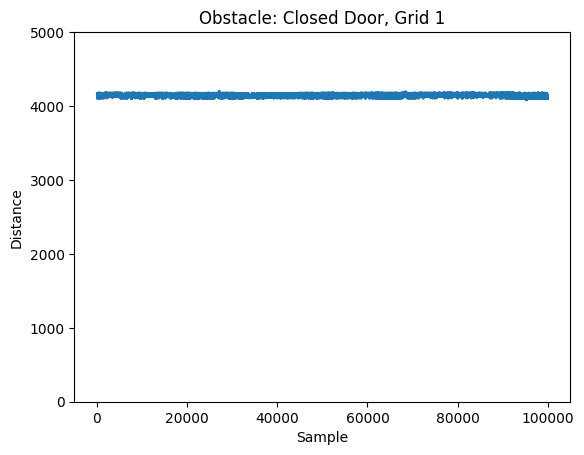

In [52]:
plt.plot(ch1_int_nums)
plt.title("Obstacle: Closed Door, Grid 1")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.ylim(0,5000)

Now I will start to look at channel 2

In [53]:
ch2_str_nums = str_numbers.iloc[ch2_start_idx[0]+1:ch2_end_idx[0]]
ch2_str_nums

100008    2571
100009    2648
100010    2648
100011    2648
100012    2552
          ... 
200004    2552
200005    2654
200006    2629
200007    2552
200008    2647
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, Length: 100001, dtype: object

In [54]:
# Converting to int
ch2_int_nums = pd.to_numeric(ch2_str_nums, errors='coerce').fillna(0).astype(np.int64)
ch2_int_nums

100008    2571
100009    2648
100010    2648
100011    2648
100012    2552
          ... 
200004    2552
200005    2654
200006    2629
200007    2552
200008    2647
Name: [2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start, Length: 100001, dtype: int64

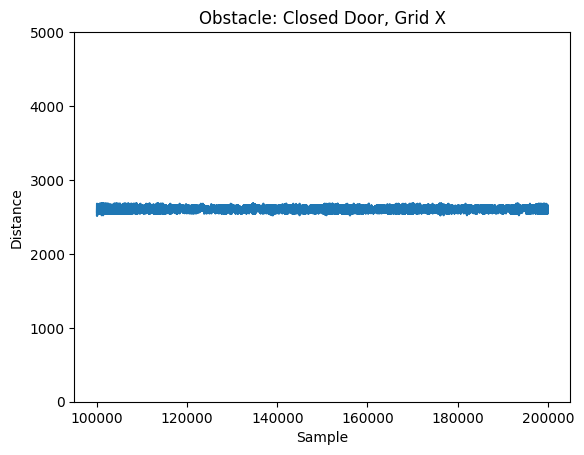

In [55]:
plt.plot(ch2_int_nums)
plt.title("Obstacle: Closed Door, Grid X")
plt.xlabel("Sample")
plt.ylabel("Distance")
plt.ylim(0,5000) # Max limit used for all plots
plt.show()

In [ ]:
out_path = "D:/Courses/UUJ/Research Project/masters_project/Data Collection/RawDataCollection/Large Narrow Bin Mid-Hallway/processed_data/df.csv"

In [56]:
ch1_int_nums_df = pd.DataFrame(ch1_int_nums)
ch2_int_nums_df = pd.DataFrame(ch2_int_nums)

#ch1_int_nums_df.reset_index(names='Ch1')
#ch2_int_nums_df.reset_index(names='Ch2')

#ch2_int_nums_df.head()
# d = [ch1_int_nums_df,ch2_int_nums_df]
# result = pd.concat(d, axis=1)
# result

In [57]:
d1 = [ch1_int_nums_df.reset_index(), ch2_int_nums_df.reset_index()]
result1 = pd.concat(d1, axis=1)

In [58]:
result1.head()

,index,[2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start,index,[2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start
0,3,4149,100008,2571
1,4,4126,100009,2648
2,5,4150,100010,2648
3,6,4126,100011,2648
4,7,4150,100012,2552


In [59]:
result1.describe()

,index,[2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start,index,[2023-01-01 10:54:25.805] Ultrasonic Sensor Data Capture Start
count,100001.000000,100001.000000,100001.000000,100001.000000
mean,50003.000000,4142.463915,150008.000000,2617.790082
std,28867.946472,21.640257,28867.946472,28.588621
min,3.000000,4080.000000,100008.000000,2514.000000
25%,25003.000000,4128.000000,125008.000000,2604.000000
50%,50003.000000,4130.000000,150008.000000,2623.000000
75%,75003.000000,4152.000000,175008.000000,2630.000000
max,100003.000000,4202.000000,200008.000000,2680.000000


In [ ]:
ch2_int_nums_df.to_csv(out_path,index=False)

In [ ]:
result1.to_csv(out_path, index=False)

In [ ]:
result1